In [1]:
from IPython.core.pylabtools import figsize
%matplotlib inline
import math
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit_aer import AerSimulator
from matplotlib import pyplot as plt

simulator = AerSimulator()

In [2]:
def run_with_plot(circuit, shots=1024, ax=None, should_show_close=True, figsize=None):
    counts = simulator.run(circuit, shots=shots).result().get_counts(circuit)
    if should_show_close:
        plt.close()
    plot_histogram(counts, ax=ax, figsize=figsize)
    if should_show_close:
        plt.show()
        plt.close()


def draw_bloch_sphere(state):
    plt.close()
    plot_bloch_multivector(state)
    plt.show()
    plt.close()


def bloch_coords(a, b):
    x = round(float((b.conjugate() * a + b * a.conjugate()).real), 5)
    y = round(float((1j * (b.conjugate() * a - b * a.conjugate())).real), 5)
    z = round(float((a * a.conjugate() - b * b.conjugate()).real), 5)
    return x, y, z


def cartesian_to_spherical(x, y, z):
    r = math.sqrt(x ** 2 + y ** 2 + z ** 2)
    theta = math.degrees(math.atan2(math.sqrt(x ** 2 + y ** 2), z))
    phi = math.degrees(math.atan2(y, x) if r != 0 else 0)
    return phi, theta, r


def draw_circuit(circuit):
    plt.close()
    circuit.draw('mpl')
    plt.show()
    plt.close()

# Упражнение 1

### 2)
Соберите схему, состоящую из двух
кубитов. Установите для одного кубита состояние |0>, а для второго - состояние |1>. Добавьте операцию измерения для обоих кубитов и выполните
получившуюся схему в режиме симуляции.

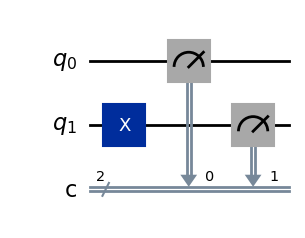

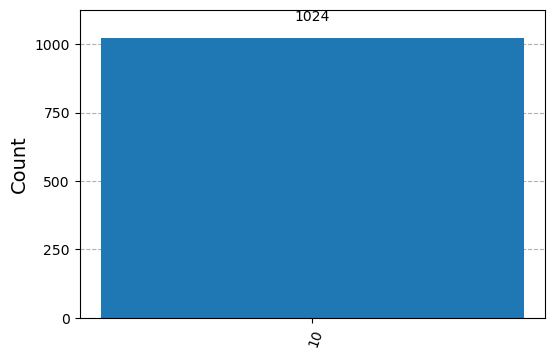

In [3]:
q_reg = QuantumRegister(2, 'q')
c_reg = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(q_reg, c_reg)

circuit.x(q_reg[1])
circuit.measure(q_reg[1], c_reg[1])
circuit.measure(q_reg[0], c_reg[0])
draw_circuit(circuit)
run_with_plot(circuit, figsize=figsize(6, 4))

### 3)
Приведите кубит в состояние суперпозиции $\left( \sqrt{\frac{1}{2}}(|0\rangle + |1\rangle) \right)$. Примените измерение к кубиту. Для созданной схемы выполните симуляцию с числом запусков: 1, 2, 8, 32, 64, 128, 512, 1024, 8192. На основе полученных результатов сделайте выводы.


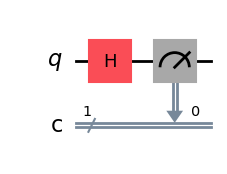

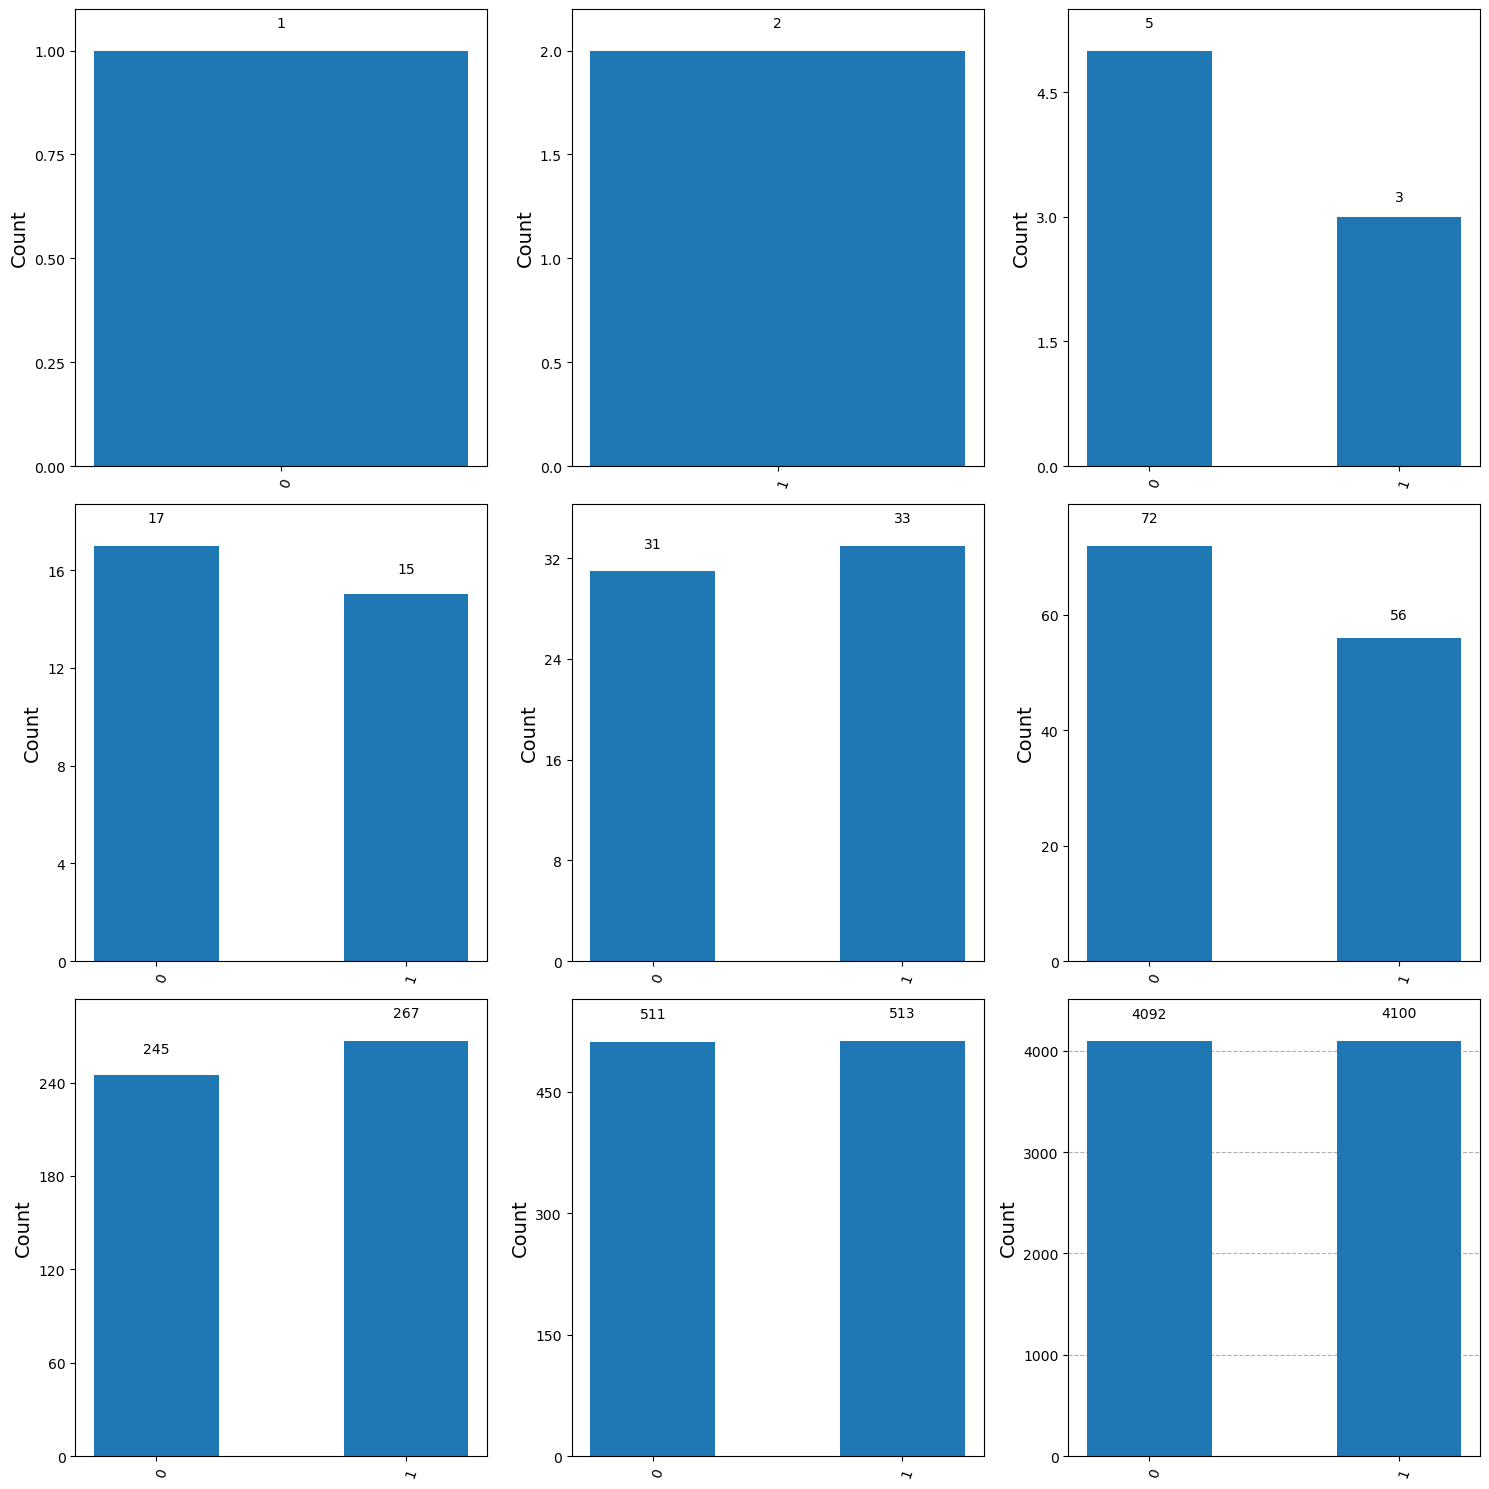

In [4]:
q_reg = QuantumRegister(1, 'q')
c_reg = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(q_reg, c_reg)

circuit.h(q_reg[0])
circuit.measure(q_reg[0], c_reg[0])
draw_circuit(circuit)
fig, axs = plt.subplots(3, 3, figsize=figsize(15, 15))
for i, shots_num in enumerate([1, 2, 8, 32, 64, 128, 512, 1024, 8192]):
    run_with_plot(circuit, shots=shots_num, ax=axs[i // 3, i % 3], should_show_close=False)
plt.tight_layout()
plt.show()

При малом количестве измерений сложно подтвердить правильность работы алгоритма, однако при увеличении числа запусков распределение вероятностей начинает сходиться к теоретическому (при использовании идеального физического квантового компьютера, здесь подобный результат достигается моделированием распределения)  

### 4) 
Соберите квантовые схемы, показанные на рис. 17
<br>
Запустите 512 симуляций данных схем. Сделайте выводы на основе получившихся результатов.



![png17](images/lab1/img17.png)

4a; corrected?


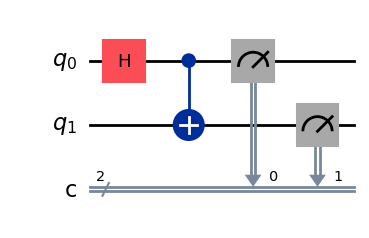

initial


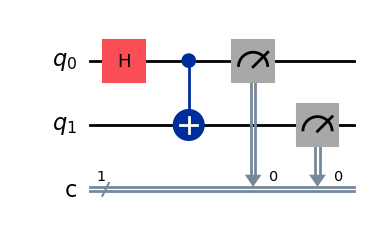

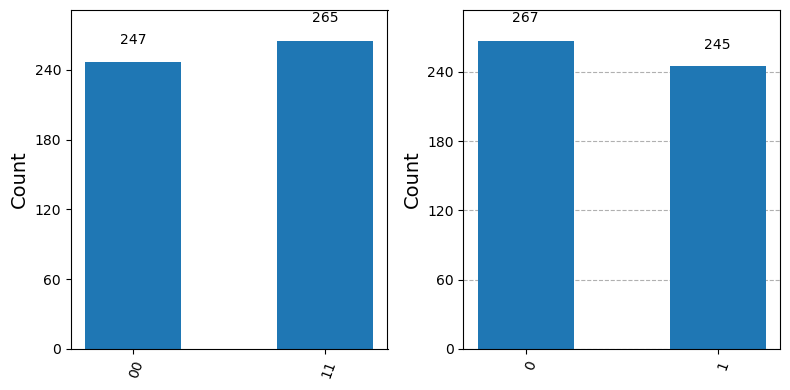

In [5]:
q_reg = QuantumRegister(2, 'q')
c_reg = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(q_reg, c_reg)

circuit.h(q_reg[0])
circuit.cx(q_reg[0], q_reg[1])
circuit.measure(q_reg[0], c_reg[0])
circuit.measure(q_reg[1], c_reg[1])
print("4a; corrected?")
draw_circuit(circuit)

q_reg = QuantumRegister(2, 'q')
c_reg = ClassicalRegister(1, 'c')
circuit_c1 = QuantumCircuit(q_reg, c_reg)

circuit_c1.h(q_reg[0])
circuit_c1.cx(q_reg[0], q_reg[1])
circuit_c1.measure(q_reg[0], c_reg[0])
circuit_c1.measure(q_reg[1], c_reg[0])

print("initial")
draw_circuit(circuit_c1)

_, axs = plt.subplots(1, 2, figsize=figsize(8, 4))
run_with_plot(circuit, shots=512, ax=axs[0], should_show_close=False)
run_with_plot(circuit_c1, shots=512, ax=axs[1], should_show_close=False)
plt.tight_layout()
plt.show()

Хотя, конкретно здесь нет большой разницы, измерять ли оба кубита или перезаписывать обычный бит значением второго кубита, так как кубиты запутанные, причём с одинаковыми значениями для конкретных состояний (|00> и |11>)

4b; corrected?


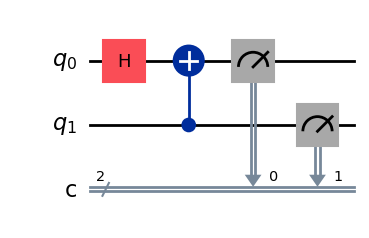

initial


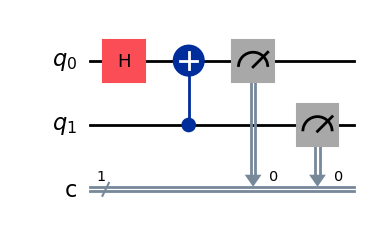

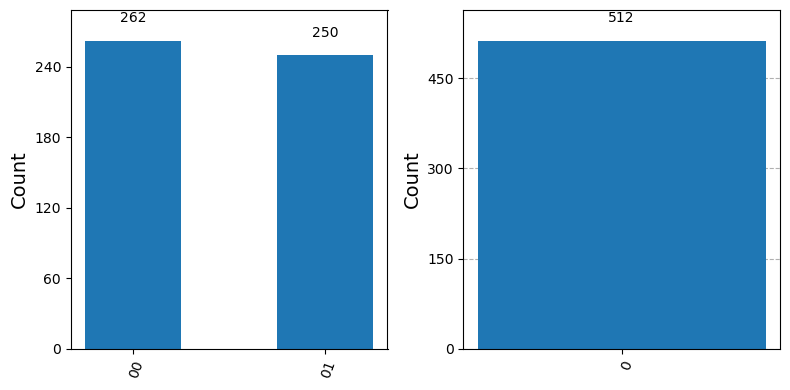

In [6]:
q_reg = QuantumRegister(2, 'q')
c_reg = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(q_reg, c_reg)

circuit.h(q_reg[0])
circuit.cx(q_reg[1], q_reg[0])
circuit.measure(q_reg[0], c_reg[0])
circuit.measure(q_reg[1], c_reg[1])
print("4b; corrected?")
draw_circuit(circuit)

q_reg = QuantumRegister(2, 'q')
c_reg = ClassicalRegister(1, 'c')
circuit_c1 = QuantumCircuit(q_reg, c_reg)

circuit_c1.h(q_reg[0])
circuit_c1.cx(q_reg[1], q_reg[0])
circuit_c1.measure(q_reg[0], c_reg[0])
circuit_c1.measure(q_reg[1], c_reg[0])
print("initial")
draw_circuit(circuit_c1)

_, axs = plt.subplots(1, 2, figsize=figsize(8, 4))
run_with_plot(circuit, shots=512, ax=axs[0], should_show_close=False)
run_with_plot(circuit_c1, shots=512, ax=axs[1], should_show_close=False)
plt.tight_layout()
plt.show()

Здесь q[1] равен |0>, он управляющий, поэтому состояние q[0] от него не зависит, кубиты - не запутанные, по измерению q[1] не узнать значение g[0].

### 5)
Создайте схемы, представленные на рис. 18 <br>
Запустите 512 симуляций данных схем. Сделайте выводы на основе получившихся результатов.

![png17](images/lab1/img18.png)

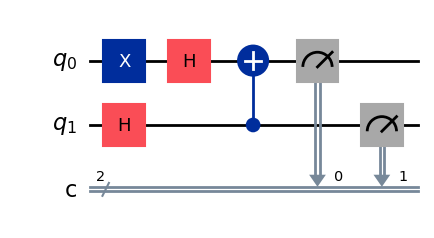

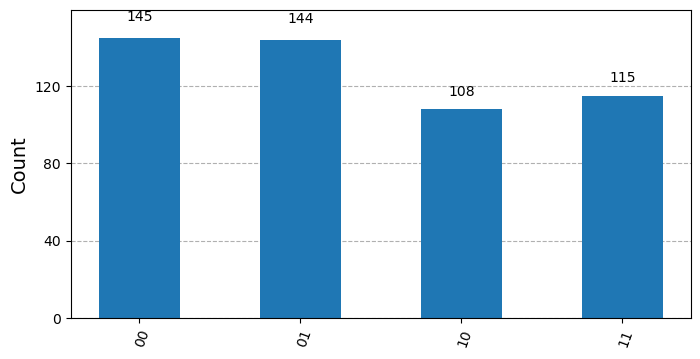

In [7]:
q_reg = QuantumRegister(2, 'q')
c_reg = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(q_reg, c_reg)

circuit.x(q_reg[0])
circuit.h(q_reg[1])
circuit.h(q_reg[0])
circuit.cx(q_reg[1], q_reg[0])
circuit.measure(q_reg[0], c_reg[0])
circuit.measure(q_reg[1], c_reg[1])

draw_circuit(circuit)

run_with_plot(circuit, shots=512)

Все пары кубитов имеют одинаковую (0.25) вероятность измерения, состояние не запутанное

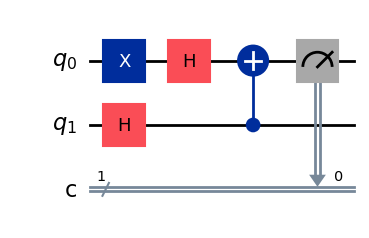

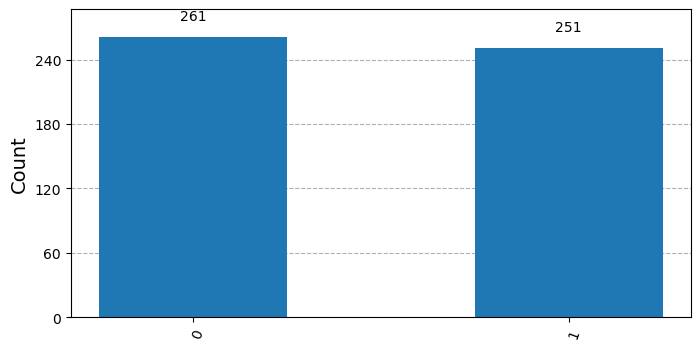

In [8]:
q_reg = QuantumRegister(2, 'q')
c_reg = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(q_reg, c_reg)

circuit.x(q_reg[0])
circuit.h(q_reg[1])
circuit.h(q_reg[0])
circuit.cx(q_reg[1], q_reg[0])
circuit.measure(q_reg[0], c_reg[0])

draw_circuit(circuit)

run_with_plot(circuit, shots=512)

По измерению лишь q[0] не получить значение q[1], в данном случае нам известно только значение q[0]

### 6)
Создайте схемы, представленные на рис. 19. Выполните симуляцию данных схем с числом измерений – 1024. Проанализируйте результаты симуляции и положение векторов на Q-сфере. Сделайте
выводы.

![png17](images/lab1/img19.png)

### a)

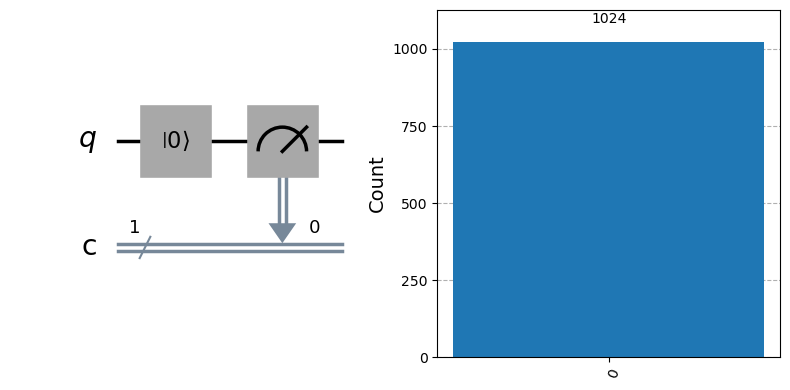

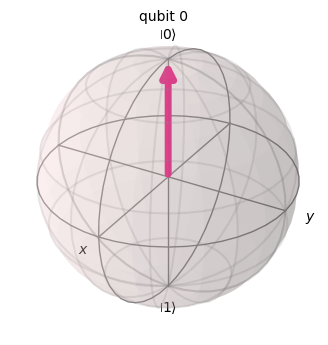

In [9]:
q_reg = QuantumRegister(1, 'q')
c_reg = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(q_reg, c_reg)
plt.close()

circuit.reset(q_reg[0])
state = Statevector.from_instruction(circuit)
circuit.measure(q_reg[0], c_reg[0])

_, axs = plt.subplots(1, 2, figsize=figsize(8, 4))

circuit.draw(ax=axs[0], output='mpl')
run_with_plot(circuit, figsize=(5, 5), should_show_close=False, ax=axs[1])

plt.tight_layout()
plt.show()

plot_bloch_multivector(state)

Кубит сбрасывается в состояние $|0\rangle$ (в котором по дефолту и пребывает), это также видно на сфере Блоха 


### b)

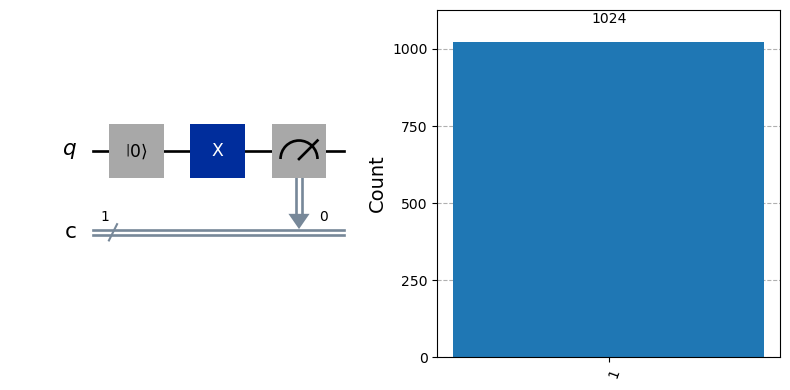

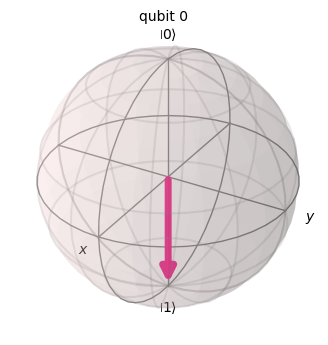

In [10]:
q_reg = QuantumRegister(1, 'q')
c_reg = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(q_reg, c_reg)
plt.close()

circuit.reset(q_reg[0])
circuit.x(q_reg[0])
state = Statevector.from_instruction(circuit)
circuit.measure(q_reg[0], c_reg[0])

_, axs = plt.subplots(1, 2, figsize=figsize(8, 4))

circuit.draw(ax=axs[0], output='mpl')
run_with_plot(circuit, figsize=(5, 5), should_show_close=False, ax=axs[1])

plt.tight_layout()
plt.show()

plot_bloch_multivector(state)

Кубит сбрасывается в состояние $|0\rangle$, затем с помощью X гейта переводится в $|1\rangle$, что подтверждается сферой Блоха


### c)

(x, y, z) = (1.0, 0.0, 0.0)
(phi, theta, r) = (0.0, 90.0, 1.0)
(a b): [0.70710678+0.j 0.70710678+0.j]
(|a|^2 |b|^2): [0.5 0.5]


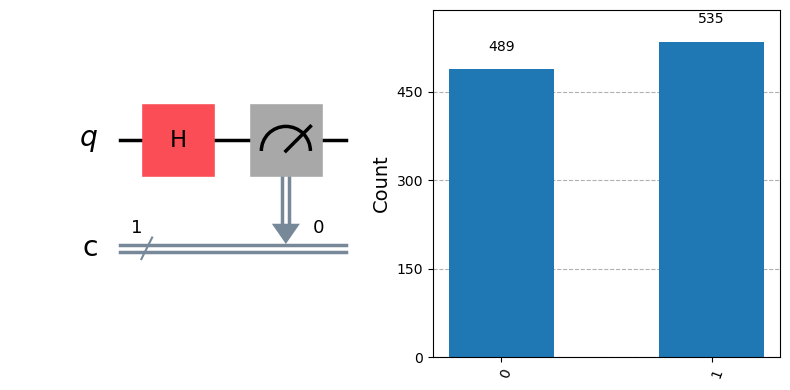

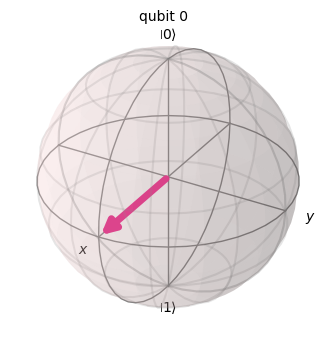

In [11]:
q_reg = QuantumRegister(1, 'q')
c_reg = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(q_reg, c_reg)
plt.close()
circuit.h(q_reg[0])
state = Statevector.from_instruction(circuit)
circuit.measure(q_reg[0], c_reg[0])
xyz = bloch_coords(state[0], state[1])
print("(x, y, z) =", xyz)
print("(phi, theta, r) =", cartesian_to_spherical(*xyz))
print("(a b):", state.data)
print("(|a|^2 |b|^2):", state.probabilities())
_, axs = plt.subplots(1, 2, figsize=figsize(8, 4))

circuit.draw(ax=axs[0], output='mpl')
run_with_plot(circuit, figsize=(5, 5), should_show_close=False, ax=axs[1])

plt.tight_layout()
plt.show()
plot_bloch_multivector(state)

Здесь состояние - суперпозиция $|0\rangle$ и $|1\rangle$ с одинаковыми коэффициентами $\frac{1}{\sqrt{2}}$. Угол $\theta$ в $90 \degree$ как раз распологает вектор состояния на сфере между $|0\rangle$ и $|1\rangle$.


### d)


(x, y, z) = (-1.0, 0.0, 0.0)
(phi, theta, r) = (180.0, 90.0, 1.0)
(a b): [ 0.70710678+0.j -0.70710678+0.j]
(|a|^2 |b|^2): [0.5 0.5]


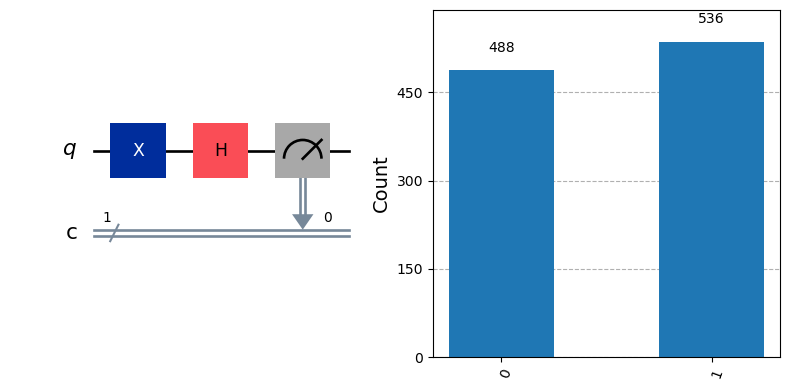

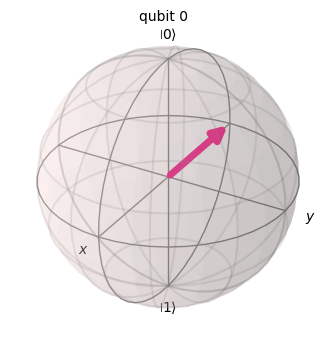

In [12]:
q_reg = QuantumRegister(1, 'q')
c_reg = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(q_reg, c_reg)
plt.close()
circuit.x(q_reg[0])
circuit.h(q_reg[0])
state = Statevector.from_instruction(circuit)
circuit.measure(q_reg[0], c_reg[0])
xyz = bloch_coords(state[0], state[1])
print("(x, y, z) =", xyz)
print("(phi, theta, r) =", cartesian_to_spherical(*xyz))
print("(a b):", state.data)
print("(|a|^2 |b|^2):", state.probabilities())
_, axs = plt.subplots(1, 2, figsize=figsize(8, 4))

circuit.draw(ax=axs[0], output='mpl')
run_with_plot(circuit, figsize=(5, 5), should_show_close=False, ax=axs[1])

plt.tight_layout()
plt.show()
plot_bloch_multivector(state)

Здесь вероятности также равны, но перед коэффициентом $b$ есть минус, что приводит к повороту на $180 \degree$ по $\phi$ на сфере.

### e)

(x, y, z) = (0.0, -0.86603, 0.5)
(phi, theta, r) = (-90.0, 60.00013167135259, 1.0000039804420782)
(a b): [0.8660254+0.j  0.       -0.5j]
(|a|^2 |b|^2): [0.75 0.25]


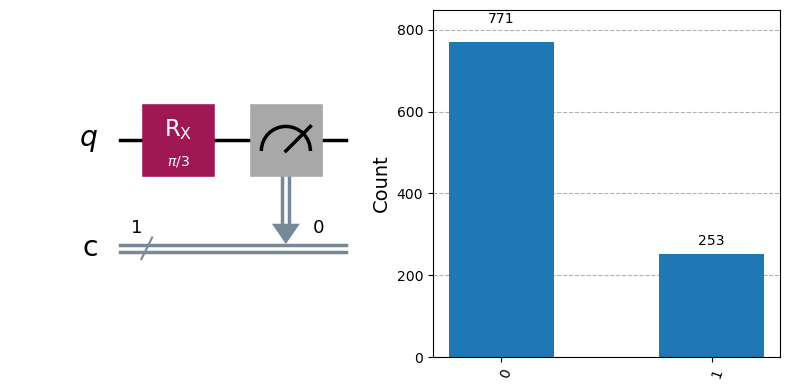

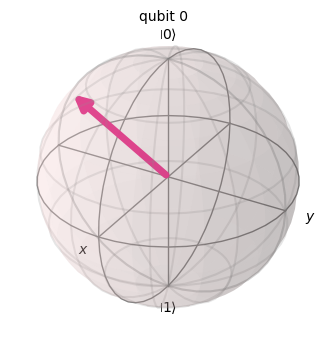

In [13]:
q_reg = QuantumRegister(1, 'q')
c_reg = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(q_reg, c_reg)
plt.close()
circuit.rx(np.pi / 3, q_reg[0])
state = Statevector.from_instruction(circuit)
circuit.measure(q_reg[0], c_reg[0])
xyz = bloch_coords(state[0], state[1])
print("(x, y, z) =", xyz)
print("(phi, theta, r) =", cartesian_to_spherical(*xyz))
print("(a b):", state.data)
print("(|a|^2 |b|^2):", state.probabilities())
_, axs = plt.subplots(1, 2, figsize=figsize(8, 4))

circuit.draw(ax=axs[0], output='mpl')
run_with_plot(circuit, figsize=(5, 5), should_show_close=False, ax=axs[1])

plt.tight_layout()
plt.show()
plot_bloch_multivector(state)

Гейт должен был повернуть вектор состояния на $\frac{\pi}{3}$ вокруг $Ox$, что он и сделал (вектор отклонился от $|0\rangle$ на $60 \degree$.

### f)

(x, y, z) = (0.0, 0.86603, -0.5)
(phi, theta, r) = (90.0, 119.99986832864741, 1.0000039804420782)
(a b): [0.       -0.5j 0.8660254+0.j ]
(|a|^2 |b|^2): [0.25 0.75]


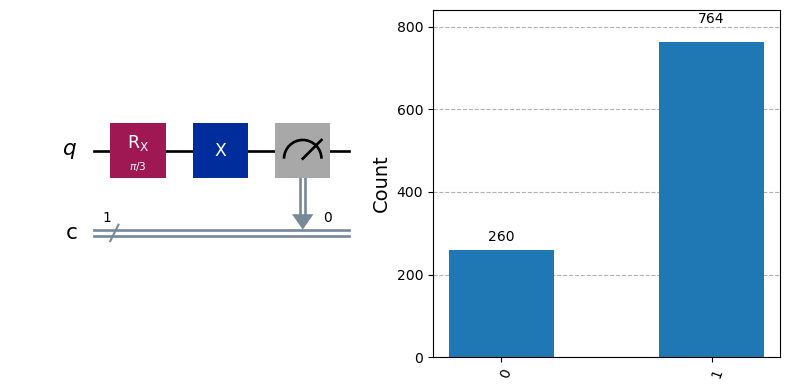

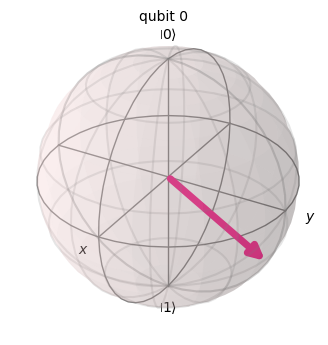

In [14]:
q_reg = QuantumRegister(1, 'q')
c_reg = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(q_reg, c_reg)
plt.close()
circuit.rx(np.pi / 3, q_reg[0])
circuit.x(q_reg[0])
state = Statevector.from_instruction(circuit)
circuit.measure(q_reg[0], c_reg[0])
xyz = bloch_coords(state[0], state[1])
print("(x, y, z) =", xyz)
print("(phi, theta, r) =", cartesian_to_spherical(*xyz))
print("(a b):", state.data)
print("(|a|^2 |b|^2):", state.probabilities())
_, axs = plt.subplots(1, 2, figsize=figsize(8, 4))

circuit.draw(ax=axs[0], output='mpl')
run_with_plot(circuit, figsize=(5, 5), should_show_close=False, ax=axs[1])

plt.tight_layout()
plt.show()
plot_bloch_multivector(state)

Гейт $X$ инвертировал результат предыдущего пункта, поменяв $a$ и $b$ местами, координаты по $y$ и $z$ умножились на $-1$.

# Упражнение 2 (вариант 14)


### 1.
<br>
Получите кубит в состоянии суперпозиции $\frac{1}{\sqrt{2}}\left(|0\rangle + |1\rangle\right)$

(a b): [0.70710678+0.j 0.70710678+0.j]


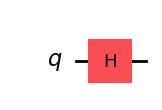

In [15]:
q_reg = QuantumRegister(1, 'q')
circuit = QuantumCircuit(q_reg)
plt.close()
circuit.h(q_reg[0])
state = Statevector.from_instruction(circuit)
print("(a b):", state.data)

circuit.draw(output='mpl')
plt.show()

### 2.
<br>
Двумя способами получите кубит в состоянии суперпозиции $\frac{1}{\sqrt{2}}\left(|0\rangle - |1\rangle\right)$


1: (a b): [ 0.70710678+0.j -0.70710678+0.j]
2: (a b): [ 0.70710678+0.j -0.70710678+0.j]


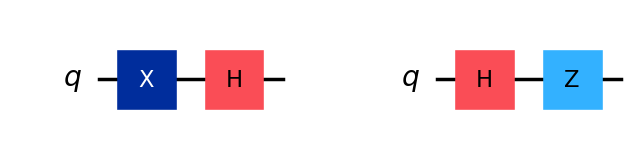

In [16]:
plt.close()
_, axs = plt.subplots(1, 2, figsize=figsize(8, 4))
q_reg = QuantumRegister(1, 'q')
circuit = QuantumCircuit(q_reg)
circuit.x(q_reg[0])
circuit.h(q_reg[0])
state = Statevector.from_instruction(circuit)
print("1: (a b):", state.data)

circuit.draw(output='mpl', ax=axs[0])
q_reg = QuantumRegister(1, 'q')
circuit = QuantumCircuit(q_reg)
circuit.h(q_reg[0])
circuit.z(q_reg[0])
state = Statevector.from_instruction(circuit)
print("2: (a b):", state.data)

circuit.draw(output='mpl', ax=axs[1])
plt.show()

### 3.
<br>
Получите кубит в состоянии суперпозиции $\frac{1}{\sqrt{2}}\left(-|0\rangle + |1\rangle\right)$


(a b): [-0.70710678+0.j  0.70710678+0.j]


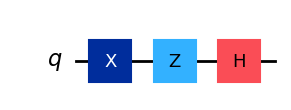

In [17]:
q_reg = QuantumRegister(1, 'q')
circuit = QuantumCircuit(q_reg)
plt.close()
circuit.x(q_reg[0])
circuit.z(q_reg[0])
circuit.h(q_reg[0])
state = Statevector.from_instruction(circuit)
print("(a b):", state.data)

circuit.draw(output='mpl')
plt.show()

## Вариант
<br>
Вероятность $|0\rangle  = 0.25 $, $|1\rangle  = 0.75$

### 4.
С помощью вентиля RX создайте кубит в состоянии (𝑎 | 0⟩ + 𝑏 | 1⟩). Вероятности реализации каждого состояния приведены в таблице 1. Выполните
симуляцию. Получите математическое обоснование результата.


Действуя RX на $|0\rangle$, получаем $\cos \left( \frac{\theta}{2} \right) |0\rangle -i \sin \left( \frac{\theta}{2} \right) |1\rangle$. У нас есть значения $|a|^2 = 0.25$ и $|b|^2 = 0.75$. $\cos^2\left( \frac{\theta}{2} \right) = 0.25$
<br>
$\theta =2 \pi n - \frac{4\pi}{3}, n \in Z$ или $\theta =2 \pi n - \frac{8\pi}{3}, n \in Z$
<br>
Чтобы выполнялось $- \sin \left( \frac{\theta}{2} \right) < 0$, возьмём значение $\theta =  \frac{2\pi}{3}$.
<br>
Затем можно подействовать гейтом S, чтобы умножить $b$ на $i$ (на вероятность это не повлияет, просто избавимся от минуса и $i$).

(a b): [0.5      +0.j 0.8660254+0.j]
(|a|^2 |b|^2): [0.25 0.75]


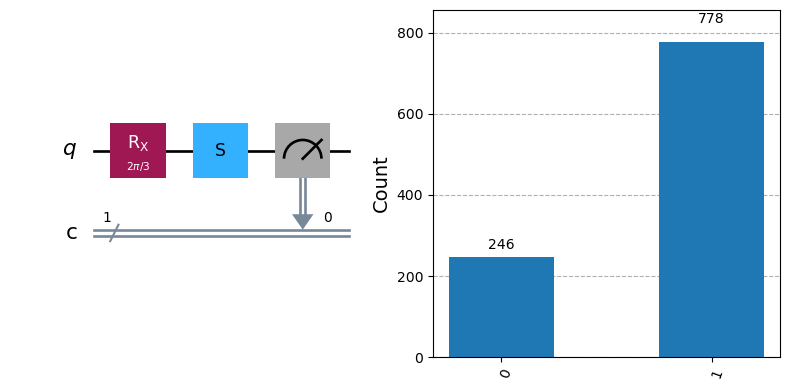

In [18]:
q_reg = QuantumRegister(1, 'q')
c_reg = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(q_reg, c_reg)
plt.close()
circuit.rx(2 * np.pi / 3, q_reg[0])
circuit.s(q_reg[0])
state = Statevector.from_instruction(circuit)
circuit.measure(q_reg[0], c_reg[0])
print("(a b):", state.data)
print("(|a|^2 |b|^2):", state.probabilities())

_, axs = plt.subplots(1, 2, figsize=figsize(8, 4))

circuit.draw(ax=axs[0], output='mpl')
run_with_plot(circuit, figsize=(5, 5), should_show_close=False, ax=axs[1])

plt.tight_layout()
plt.show()

### 5.
С помощью однокубитного вентиля RY получите кубит в состоянии суперпозиции (𝑎 | 0⟩ + 𝑏 | 1⟩). Вероятности реализации каждого состояния приведены
в таблице 1. Выполните симуляцию. Получите математическое обоснование
результата.

Здесь, действуя на $|0\rangle$, получаем $\cos \left( \frac{\theta}{2} \right) |0\rangle + \sin \left( \frac{\theta}{2} \right) |1\rangle$, также $\theta =2 \pi n - \frac{4\pi}{3}, n \in Z$ или $\theta =2 \pi n - \frac{8\pi}{3}, n \in Z$.
<br>
Чтобы выполнялось $\sin \left( \frac{\theta}{2} \right) > 0$, возьмём значение $\theta =  \frac{2\pi}{3}$.

(a b): [0.5      +0.j 0.8660254+0.j]
(|a|^2 |b|^2): [0.25 0.75]


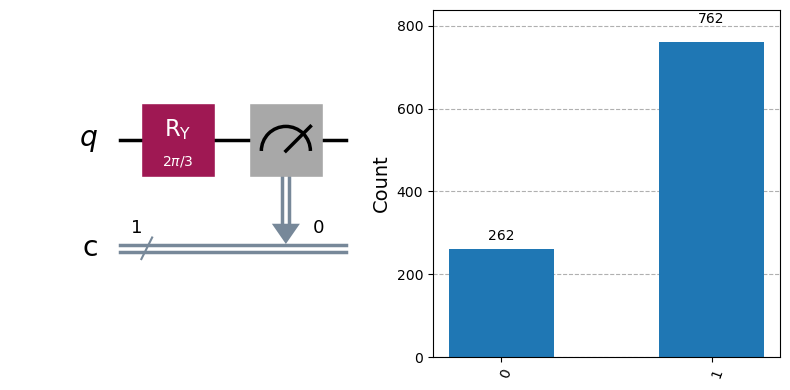

In [19]:
q_reg = QuantumRegister(1, 'q')
c_reg = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(q_reg, c_reg)
plt.close()
circuit.ry(2 * np.pi / 3, q_reg[0])
state = Statevector.from_instruction(circuit)
circuit.measure(q_reg[0], c_reg[0])
print("(a b):", state.data)
print("(|a|^2 |b|^2):", state.probabilities())

_, axs = plt.subplots(1, 2, figsize=figsize(8, 4))

circuit.draw(ax=axs[0], output='mpl')
run_with_plot(circuit, figsize=(5, 5), should_show_close=False, ax=axs[1])

plt.tight_layout()
plt.show()

### 6.
<br>
С помощью однокубитного вентиля U получите кубит в состоянии суперпозиции (𝑎 | 0⟩ + 𝑏 | 1⟩). Вероятности реализации каждого состояния приведены
в таблице 1. Выполните симуляцию. Получите математическое обоснование
результата.


![a](images/lab1/U_gate.png)

Если взять любую $\lambda$ и $\phi  = 0$, задача эквивалентна предыдущей.

(a b): [0.5      +0.j 0.8660254+0.j]
(|a|^2 |b|^2): [0.25 0.75]


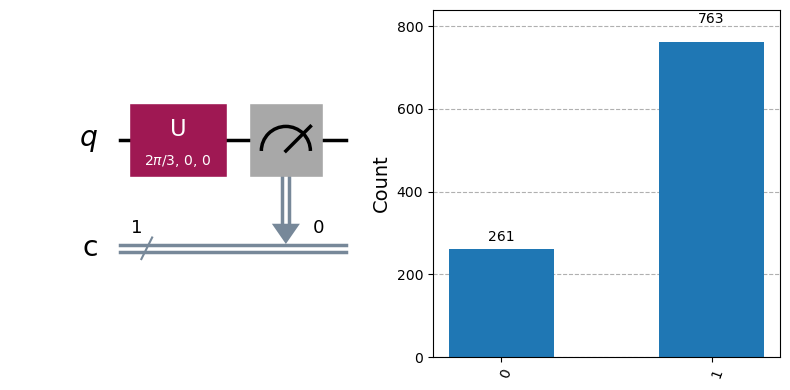

In [20]:
q_reg = QuantumRegister(1, 'q')
c_reg = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(q_reg, c_reg)
plt.close()
circuit.u(2 * np.pi / 3, 0, 0, q_reg[0])
state = Statevector.from_instruction(circuit)
circuit.measure(q_reg[0], c_reg[0])
print("(a b):", state.data)
print("(|a|^2 |b|^2):", state.probabilities())

_, axs = plt.subplots(1, 2, figsize=figsize(8, 4))

circuit.draw(ax=axs[0], output='mpl')
run_with_plot(circuit, figsize=(5, 5), should_show_close=False, ax=axs[1])

plt.tight_layout()
plt.show()

### 7.
<br>
С помощью однокубитного вентиля RX получите кубит в состоянии суперпозиции (𝑎 | 0⟩ −𝑏 | 1⟩). Вероятности реализации каждого состояния приведены
в таблице 1. Выполните симуляцию. Получите математическое обоснование
результата.

Аналогично п. 4, но берём другое $\theta$ или не доиножаем $b$ на $i$, оставив его мнимую часть положительной.

(a b): [0.5+0.j        0. -0.8660254j]
(|a|^2 |b|^2): [0.25 0.75]


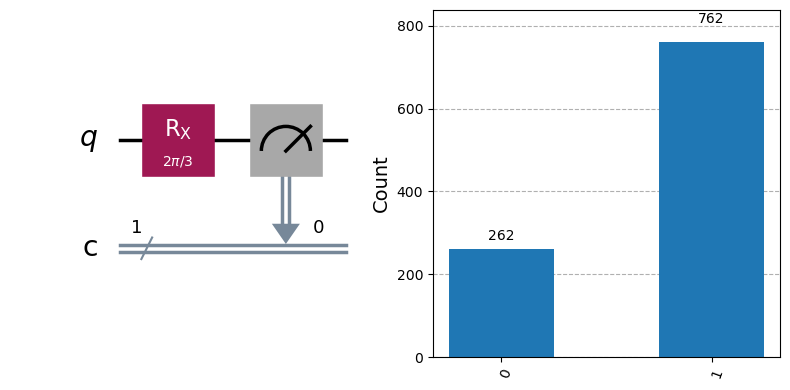

In [21]:
q_reg = QuantumRegister(1, 'q')
c_reg = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(q_reg, c_reg)
plt.close()
circuit.rx(2 * np.pi / 3, q_reg[0])
state = Statevector.from_instruction(circuit)
circuit.measure(q_reg[0], c_reg[0])
print("(a b):", state.data)
print("(|a|^2 |b|^2):", state.probabilities())

_, axs = plt.subplots(1, 2, figsize=figsize(8, 4))

circuit.draw(ax=axs[0], output='mpl')
run_with_plot(circuit, figsize=(5, 5), should_show_close=False, ax=axs[1])

plt.tight_layout()
plt.show()

### 8.
<br>
С помощью однокубитного вентиля RY получите кубит в состоянии суперпозиции (𝑎 | 0⟩ −𝑏 | 1⟩). Вероятности реализации каждого состояния приведены
в таблице 1. Выполните симуляцию. Получите математическое обоснование
результата.


Берём $\theta = - \frac{2 \pi}{3}$, чтобы получить отрицательный $\sin$ и положительный $\cos$ от $\frac{\theta}{2}$.

(a b): [ 0.5      +0.j -0.8660254+0.j]
(|a|^2 |b|^2): [0.25 0.75]


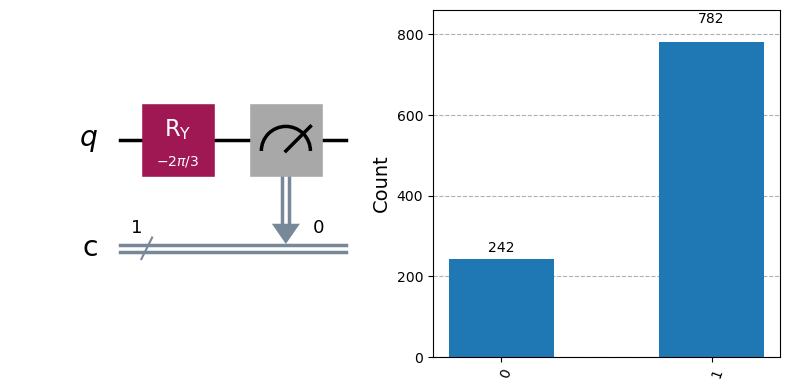

In [22]:
q_reg = QuantumRegister(1, 'q')
c_reg = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(q_reg, c_reg)
plt.close()
circuit.ry(- 2 * np.pi / 3, q_reg[0])
state = Statevector.from_instruction(circuit)
circuit.measure(q_reg[0], c_reg[0])
print("(a b):", state.data)
print("(|a|^2 |b|^2):", state.probabilities())

_, axs = plt.subplots(1, 2, figsize=figsize(8, 4))

circuit.draw(ax=axs[0], output='mpl')
run_with_plot(circuit, figsize=(5, 5), should_show_close=False, ax=axs[1])

plt.tight_layout()
plt.show()

### 9.
<br>
С помощью однокубитного вентиля U получите кубит в состоянии суперпозиции (𝑎 | 0⟩ −𝑏 | 1⟩). Вероятности реализации каждого состояния приведены
в таблице 1. Выполните симуляцию. Получите математическое обоснование
результата.

Аналогично п. 6, но с заменой $\theta =  \frac{2 \pi}{3}$ на $\theta =  -\frac{2 \pi}{3}$.

(a b): [ 0.5      +0.j -0.8660254+0.j]
(|a|^2 |b|^2): [0.25 0.75]


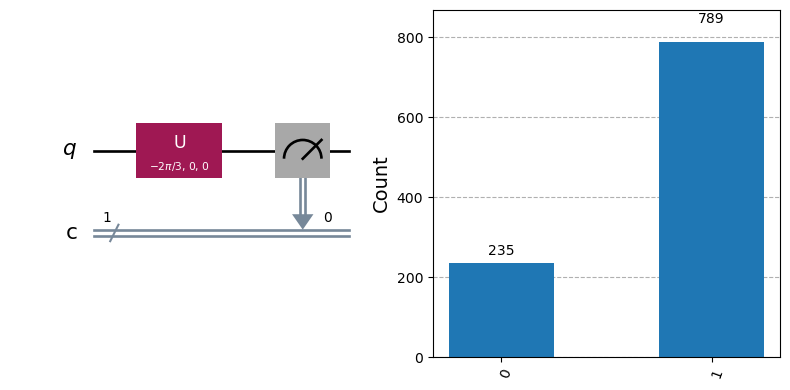

In [23]:
q_reg = QuantumRegister(1, 'q')
c_reg = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(q_reg, c_reg)
plt.close()
circuit.u(- 2 * np.pi / 3, 0, 0, q_reg[0])
state = Statevector.from_instruction(circuit)
circuit.measure(q_reg[0], c_reg[0])
print("(a b):", state.data)
print("(|a|^2 |b|^2):", state.probabilities())

_, axs = plt.subplots(1, 2, figsize=figsize(8, 4))

circuit.draw(ax=axs[0], output='mpl')
run_with_plot(circuit, figsize=(5, 5), should_show_close=False, ax=axs[1])

plt.tight_layout()
plt.show()

### 10.
<br>
С помощью вентилей поворота получите кубит в состоянии (𝑎 | 0⟩+𝑏 | 1⟩). Вероятности реализации каждого состояния, приведены в таблице 1. Выполните
симуляцию. Получите математическое обоснование результата.


см. пункт 6

(a b): [0.5      +0.j 0.8660254+0.j]
(|a|^2 |b|^2): [0.25 0.75]


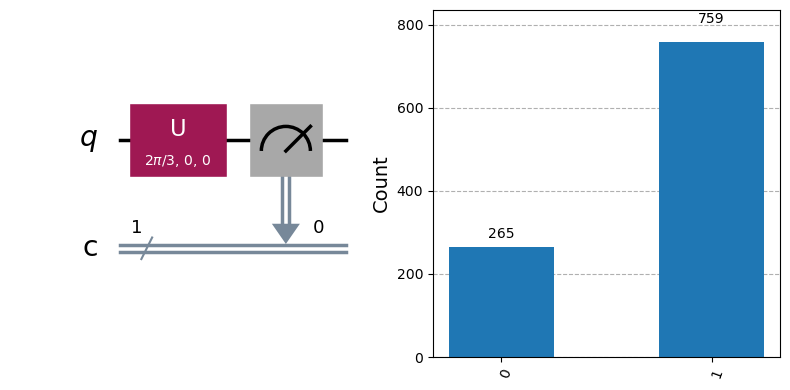

In [24]:
q_reg = QuantumRegister(1, 'q')
c_reg = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(q_reg, c_reg)
plt.close()
circuit.u(2 * np.pi / 3, 0, 0, q_reg[0])
state = Statevector.from_instruction(circuit)
circuit.measure(q_reg[0], c_reg[0])
print("(a b):", state.data)
print("(|a|^2 |b|^2):", state.probabilities())

_, axs = plt.subplots(1, 2, figsize=figsize(8, 4))

circuit.draw(ax=axs[0], output='mpl')
run_with_plot(circuit, figsize=(5, 5), should_show_close=False, ax=axs[1])

plt.tight_layout()
plt.show()

### 11.
<br>
С помощью вентиля RX получите кубит в состоянии суперпозиции (𝑎 | 0⟩+𝑏 |
1⟩) в соответствии с вариантом, представленном в таблице 1. Далее составьте
схему, представленную на рис. 20. Выполните симуляцию. Получите математическое обоснование результата.

![](images/lab1/img20.png)

(a b) before h: [0.5+0.j        0. +0.8660254j]
(phi, theta, r) = (90.0, 119.99986832864741, 1.0000039804420782)
(|a|^2 |b|^2) before h: [0.25 0.75]
(a b): [0.35355339+0.61237244j 0.35355339-0.61237244j]
(|a|^2 |b|^2): [0.5 0.5]
(phi, theta, r) = (-119.99986832864741, 90.0, 1.0000039804420782)


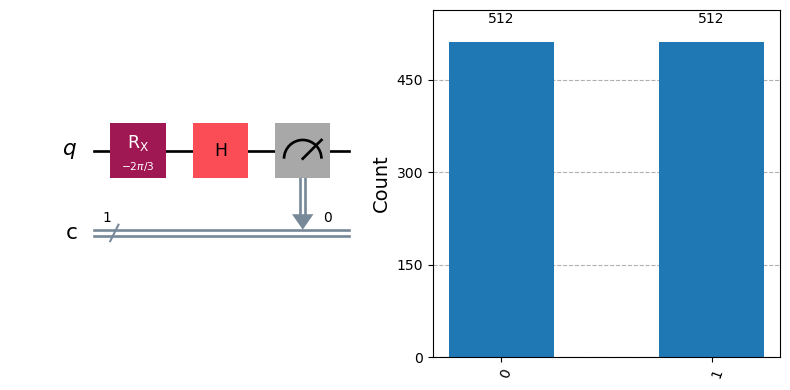

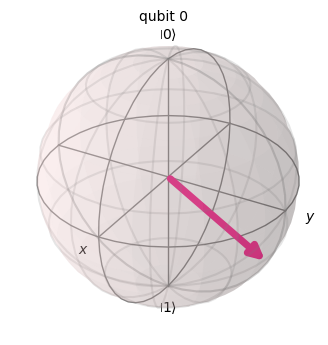

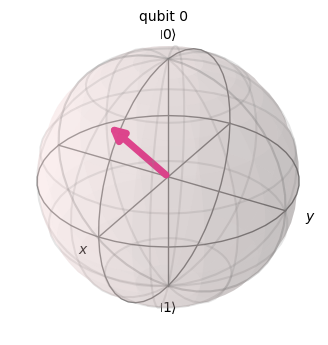

In [25]:
q_reg = QuantumRegister(1, 'q')
c_reg = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(q_reg, c_reg)
plt.close()
circuit.rx(- 2 * np.pi / 3, q_reg[0])
state_before_h = Statevector.from_instruction(circuit)
circuit.h(q_reg[0])
state = Statevector.from_instruction(circuit)
circuit.measure(q_reg[0], c_reg[0])
print("(a b) before h:", state_before_h.data)
print("(phi, theta, r) =", cartesian_to_spherical(*bloch_coords(state_before_h[0], state_before_h[1])))
print("(|a|^2 |b|^2) before h:", state_before_h.probabilities())
print("(a b):", state.data)
print("(|a|^2 |b|^2):", state.probabilities())
print("(phi, theta, r) =", cartesian_to_spherical(*bloch_coords(state[0], state[1])))

_, axs = plt.subplots(1, 2, figsize=figsize(8, 4))

circuit.draw(ax=axs[0], output='mpl')
run_with_plot(circuit, figsize=(5, 5), should_show_close=False, ax=axs[1])

plt.tight_layout()
plot_bloch_multivector(state_before_h)
plot_bloch_multivector(state)
plt.show()

Гейт Адамара повернул вектор состояния вокруг $\frac{Ox + Oz}{\sqrt{2}}$ на $\pi$.

### 12.
С помощью вентиля Rx получите кубит в состоянии суперпозиции a|0> +
b|1>. Вероятности реализации каждого состояния, приведены в таблице 1.
Далее составьте схему, представленную на рис. 21. Выполните симуляцию.
Получите математическое обоснование результата.

![](images/lab1/img21.png)

(a b): [0.5+0.j        0. +0.8660254j]
(|a|^2 |b|^2): [0.25 0.75]


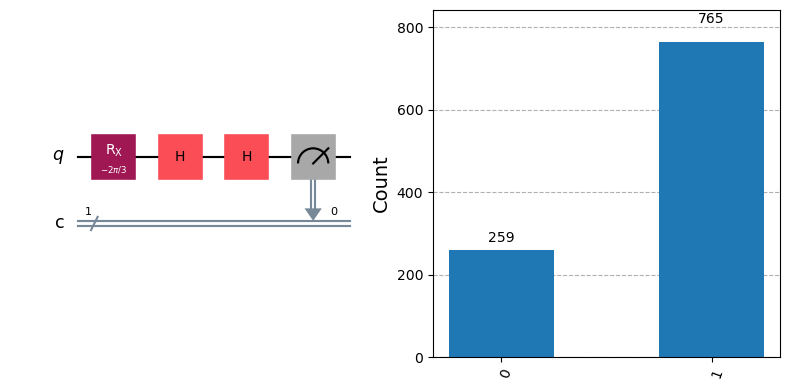

In [26]:
q_reg = QuantumRegister(1, 'q')
c_reg = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(q_reg, c_reg)
plt.close()
circuit.rx(- 2 * np.pi / 3, q_reg[0])
circuit.h(q_reg[0])
circuit.h(q_reg[0])
state = Statevector.from_instruction(circuit)
circuit.measure(q_reg[0], c_reg[0])

print("(a b):", state.data)
print("(|a|^2 |b|^2):", state.probabilities())

_, axs = plt.subplots(1, 2, figsize=figsize(8, 4))

circuit.draw(ax=axs[0], output='mpl')
run_with_plot(circuit, figsize=(5, 5), should_show_close=False, ax=axs[1])

plt.tight_layout()
plt.show()

Для гейта $H$ выполняется $HH$ = $I$. Это подтвердилось в задании тем, что два применённых подряд гейта $H$ в итоге вернули состояние после поворота $RX$, распределение вероятностей осталось прежним.

### 13.
Соберите квантовые схемы показанные на рис. 22. Выполните симуляцию.
Получите математическое обоснование результата.

![](images/lab1/img22.png)

### a)

(a b): [0.70710678+0.j 0.70710678+0.j]
(|a|^2 |b|^2): [0.5 0.5]


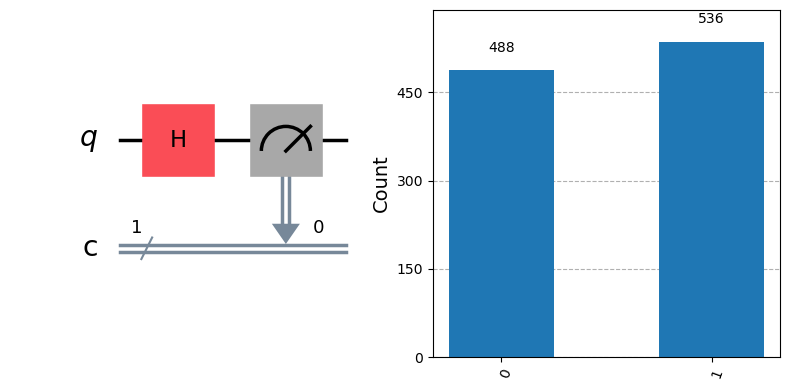

In [27]:
q_reg = QuantumRegister(1, 'q')
c_reg = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(q_reg, c_reg)
plt.close()
circuit.h(q_reg[0])
state = Statevector.from_instruction(circuit)
circuit.measure(q_reg[0], c_reg[0])
print("(a b):", state.data)
print("(|a|^2 |b|^2):", state.probabilities())

_, axs = plt.subplots(1, 2, figsize=figsize(8, 4))

circuit.draw(ax=axs[0], output='mpl')
run_with_plot(circuit, figsize=(5, 5), should_show_close=False, ax=axs[1])

plt.tight_layout()
plt.show()

Применяя гейт $H$ к $|0\rangle$, получаем $\frac{1}{\sqrt{2}}\left(|0\rangle + |1\rangle\right)$. Результат симуляции соответствует теории.

### b)

(a b): [ 0.70710678+0.j -0.70710678+0.j]
(|a|^2 |b|^2): [0.5 0.5]


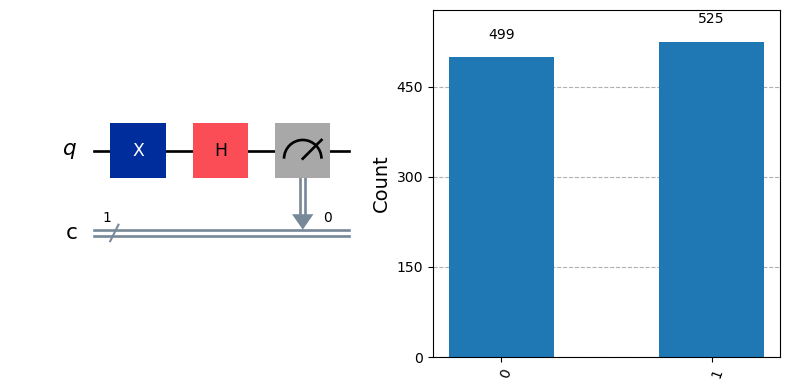

In [28]:
q_reg = QuantumRegister(1, 'q')
c_reg = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(q_reg, c_reg)
plt.close()
circuit.x(q_reg[0])
circuit.h(q_reg[0])
state = Statevector.from_instruction(circuit)
circuit.measure(q_reg[0], c_reg[0])
print("(a b):", state.data)
print("(|a|^2 |b|^2):", state.probabilities())

_, axs = plt.subplots(1, 2, figsize=figsize(8, 4))

circuit.draw(ax=axs[0], output='mpl')
run_with_plot(circuit, figsize=(5, 5), should_show_close=False, ax=axs[1])

plt.tight_layout()
plt.show()

Инвертируем $|0\rangle$, затем, применяя гейт $H$ к $|1\rangle$, получаем $\frac{1}{\sqrt{2}}\left(|0\rangle - |1\rangle\right)$. Квадраты модулей $a$ и $b$ равны, результаты измерения равновероятны. Результат симуляции соответствует теории.

### c)

(a b): [ 0.70710678+0.j -0.70710678+0.j]
(|a|^2 |b|^2): [0.5 0.5]


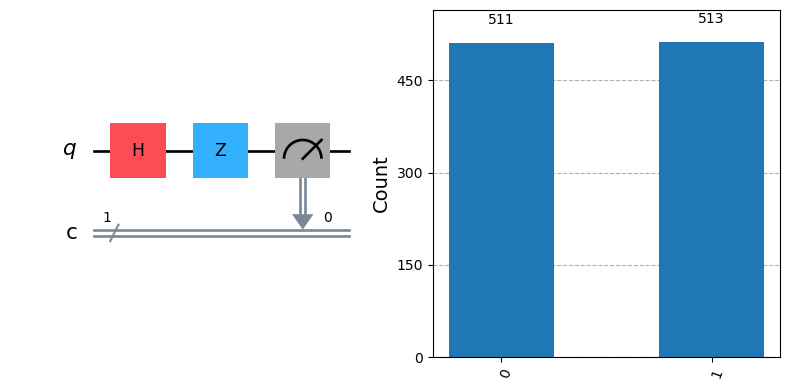

In [29]:
q_reg = QuantumRegister(1, 'q')
c_reg = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(q_reg, c_reg)
plt.close()
circuit.h(q_reg[0])
circuit.z(q_reg[0])
state = Statevector.from_instruction(circuit)
circuit.measure(q_reg[0], c_reg[0])
print("(a b):", state.data)
print("(|a|^2 |b|^2):", state.probabilities())

_, axs = plt.subplots(1, 2, figsize=figsize(8, 4))

circuit.draw(ax=axs[0], output='mpl')
run_with_plot(circuit, figsize=(5, 5), should_show_close=False, ax=axs[1])

plt.tight_layout()
plt.show()

Вентиль $Z$ умножает значение $b$ на $-1$, вероятности по сравнению с пунктом $a$ не меняются.

### 14.
<br>
Соберите квантовые схемы показанные на рис. 23. Выполните симуляцию.
Получите математическое обоснование результата.

![](images/lab1/img23.png)

### a)
<br>
На гистограмме первая цифра соответствует q[1], вторая - q[0].

In [ ]:
q_reg = QuantumRegister(2, 'q')
c_reg = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(q_reg, c_reg)
plt.close()
circuit.h(q_reg[0])
circuit.h(q_reg[1])
state = Statevector.from_instruction(circuit)
circuit.measure(q_reg[0], c_reg[0])
circuit.measure(q_reg[1], c_reg[1])
print("state:", state.data)
print("probas:", state.probabilities())

_, axs = plt.subplots(1, 2, figsize=figsize(8, 4))

circuit.draw(ax=axs[0], output='mpl')
run_with_plot(circuit, figsize=(5, 5), should_show_close=False, ax=axs[1])

plt.tight_layout()
plt.show()

После применения к каждому кубиту $H$ и перемножения состояний, получаем коэф. $0.5$ перед каждым из состояний $\{|00\rangle, |01\rangle, |10\rangle, |11\rangle\}$, тогда каждая вероятность равна $0.25$.

### b)

state: [ 0.5+0.j  0.5+0.j -0.5+0.j -0.5+0.j]
probas: [0.25 0.25 0.25 0.25]


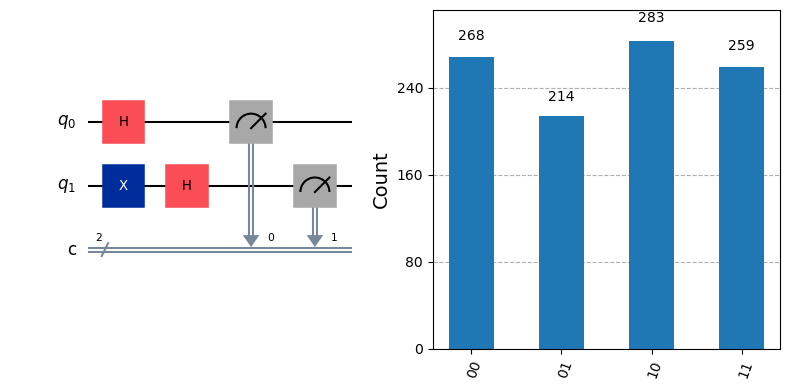

In [62]:
q_reg = QuantumRegister(2, 'q')
c_reg = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(q_reg, c_reg)
plt.close()
circuit.h(q_reg[0])
circuit.x(q_reg[1])
circuit.h(q_reg[1])
state = Statevector.from_instruction(circuit)
circuit.measure(q_reg[0], c_reg[0])
circuit.measure(q_reg[1], c_reg[1])
print("state:", state.data)
print("probas:", state.probabilities())

_, axs = plt.subplots(1, 2, figsize=figsize(8, 4))

circuit.draw(ax=axs[0], output='mpl')
run_with_plot(circuit, figsize=(5, 5), should_show_close=False, ax=axs[1])

plt.tight_layout()
plt.show()

Здесь перемножаются $\frac{1}{\sqrt{2}}\left(|0\rangle + |1\rangle\right)$ и $\frac{1}{\sqrt{2}}\left(|0\rangle - |1\rangle\right)$. Из-за этого у двух последних состояний меняются знаки коэффициентов, вероятности не меняются.